In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [19]:
path = Path('../datasets/food-101/food-101/images/')
test_path = Path('../datasets/food-101/food-101/meta')

In [43]:
f = open(test_path/'test.txt', 'r')

In [44]:
test_labels = f.read().split('\n')

In [45]:
test_labels

['apple_pie/1011328',
 'apple_pie/101251',
 'apple_pie/1034399',
 'apple_pie/103801',
 'apple_pie/1038694',
 'apple_pie/1047447',
 'apple_pie/1068632',
 'apple_pie/110043',
 'apple_pie/1106961',
 'apple_pie/1113017',
 'apple_pie/116705',
 'apple_pie/1167170',
 'apple_pie/1174330',
 'apple_pie/1180600',
 'apple_pie/1235282',
 'apple_pie/1269202',
 'apple_pie/1272958',
 'apple_pie/1284428',
 'apple_pie/1295996',
 'apple_pie/129668',
 'apple_pie/1321400',
 'apple_pie/1327259',
 'apple_pie/1332030',
 'apple_pie/1364847',
 'apple_pie/1375404',
 'apple_pie/1398774',
 'apple_pie/1420999',
 'apple_pie/1429866',
 'apple_pie/1444702',
 'apple_pie/1461580',
 'apple_pie/1469191',
 'apple_pie/1472631',
 'apple_pie/1510125',
 'apple_pie/1510930',
 'apple_pie/1514110',
 'apple_pie/1526484',
 'apple_pie/1578710',
 'apple_pie/1579622',
 'apple_pie/1579774',
 'apple_pie/1617515',
 'apple_pie/1617793',
 'apple_pie/1626685',
 'apple_pie/1629072',
 'apple_pie/1657587',
 'apple_pie/1674492',
 'apple_pie/168

In [41]:
def is_test(item):
    return '/'.join(item.parts[-2:])[:-4] in test_labels    

# Improper test set

In [6]:
tfms = get_transforms()
size = 256
bs = 32

In [49]:
data = (ImageItemList.from_folder(path) #Where to find the data? -> in path and its subfolders
        .random_split_by_pct()             #How to split in train/valid? -> use the folders
        .label_from_folder()            #How to label? -> depending on the folder of the filenames
        .transform(tfms, size=size)       #Data augmentation? -> use tfms with a size of 64
        .databunch(bs=bs))

In [50]:
data

ImageDataBunch;

Train: LabelList
y: CategoryList (80800 items)
[Category deviled_eggs, Category deviled_eggs, Category deviled_eggs, Category deviled_eggs, Category deviled_eggs]...
Path: ../datasets/food-101/food-101/images
x: ImageItemList (80800 items)
[Image (3, 512, 512), Image (3, 512, 512), Image (3, 512, 384), Image (3, 339, 512), Image (3, 512, 512)]...
Path: ../datasets/food-101/food-101/images;

Valid: LabelList
y: CategoryList (20200 items)
[Category beef_tartare, Category cup_cakes, Category miso_soup, Category pizza, Category cannoli]...
Path: ../datasets/food-101/food-101/images
x: ImageItemList (20200 items)
[Image (3, 512, 512), Image (3, 512, 512), Image (3, 341, 512), Image (3, 512, 512), Image (3, 420, 512)]...
Path: ../datasets/food-101/food-101/images;

Test: None

In [55]:
m = {
    'resnet34' : models.resnet34,
    'resnet50' : models.resnet50,
    'resnet101' : models.resnet101,
    'resnet152' : models.resnet152
}

In [8]:
k = 'resnet50'
v = m[k]
learn = create_cnn(data, v, metrics=[accuracy, top_k_accuracy]).mixup()

In [8]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


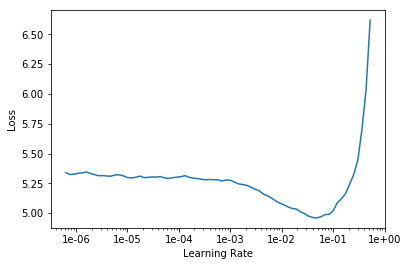

In [12]:
learn.recorder.plot()

In [9]:
lr = 8e-3

In [10]:
learn.freeze()
learn.fit_one_cycle(5 , lr)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy
1,3.090111,2.149000,0.467426,0.754554
2,2.968937,1.758198,0.568416,0.824852
3,2.704303,1.433296,0.646832,0.876089
4,2.513743,1.195460,0.722079,0.906782
5,2.445426,1.137930,0.739356,0.916238


In [11]:
learn.fit_one_cycle(5 , lr)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy
1,2.627187,1.398455,0.660198,0.878218
2,2.817791,1.503787,0.638416,0.862871
3,2.628149,1.350042,0.674307,0.885248
4,2.441247,1.166848,0.731485,0.914851
5,2.353927,1.102354,0.749752,0.921040


In [12]:
learn.fit_one_cycle(5 , lr)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy
1,2.572454,1.321599,0.681535,0.887624
2,2.735905,1.489695,0.643317,0.871287
3,2.627133,1.357761,0.677030,0.887327
4,2.436087,1.136882,0.736634,0.916188
5,2.337844,1.090627,0.753168,0.923762


In [13]:
learn.save('stage-1')

In [14]:
learn.fit_one_cycle(5 , lr/3)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy
1,2.348743,1.128028,0.740446,0.917723
2,2.477015,1.142812,0.733366,0.918861
3,2.387100,1.101183,0.747723,0.920644
4,2.340229,1.048910,0.762277,0.928614
5,2.298450,1.031810,0.767475,0.928317


In [15]:
learn.save('stage-2')

In [17]:
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


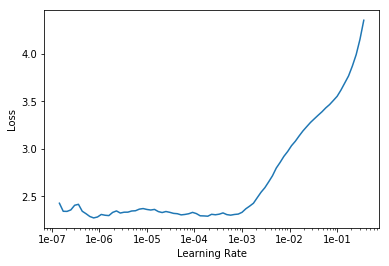

In [20]:
learn.recorder.plot(skip_start=2)

In [21]:
lr = 3e-5
lrs = learn.lr_range(slice(lr))

In [22]:
learn.fit_one_cycle(5 , lrs)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy
1,2.318433,1.027989,0.769109,0.928960
2,2.242633,1.010409,0.772525,0.931634
3,2.277928,1.000801,0.777525,0.932327
4,2.234141,0.992097,0.779455,0.934158
5,2.218892,0.987333,0.777871,0.934010


In [23]:
learn.fit_one_cycle(5 , lrs)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy
1,2.260524,0.986758,0.778168,0.934010
2,2.228987,0.979817,0.782030,0.935248
3,2.271563,0.971608,0.785149,0.936139
4,2.225526,0.959638,0.784802,0.936337
5,2.196927,0.968036,0.782574,0.935842


In [24]:
learn.fit_one_cycle(5 , lrs)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy
1,2.173836,0.956188,0.786386,0.937475
2,2.149239,0.958014,0.787673,0.938366
3,2.209629,0.946780,0.790099,0.937475
4,2.179966,0.949100,0.788762,0.939703
5,2.131225,0.949036,0.789950,0.938366


In [25]:
learn.save('stage-3')

In [26]:
learn.export(f'{k}Test')

In [27]:
learn.fit_one_cycle(20 , lrs)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy
1,2.174469,0.938292,0.789950,0.938762
2,2.184827,0.947534,0.791485,0.939010
3,2.205669,0.935280,0.792525,0.938911
4,2.143718,0.934681,0.793960,0.939703
5,2.176450,0.924550,0.794059,0.939406
6,2.136180,0.931471,0.794752,0.940149
7,2.103602,0.923308,0.796139,0.939406
8,2.179219,0.921627,0.795990,0.940495
9,2.142864,0.917378,0.797871,0.940842
10,2.135698,0.902229,0.800347,0.942624


In [28]:
learn.save('stage-4')

In [29]:
learn.fit_one_cycle(20 , lrs)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy
1,2.115938,0.896114,0.805693,0.943366
2,2.115522,0.887058,0.805792,0.943020
3,2.099315,0.884942,0.805545,0.943267
4,2.070906,0.884471,0.805297,0.942970
5,2.103920,0.884712,0.805842,0.943465
6,2.101732,0.889089,0.807426,0.943119
7,2.093577,0.872190,0.808317,0.944406
8,2.089458,0.876388,0.808564,0.944109
9,2.074410,0.870944,0.808713,0.944109
10,2.073321,0.863601,0.810594,0.944505


In [30]:
learn.save('stage-5')

In [31]:
learn.fit_one_cycle(20 , lrs*10)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy
1,2.046160,0.858366,0.814010,0.946634
2,2.102751,0.873253,0.810990,0.944851
3,2.108392,0.891377,0.805248,0.944257
4,2.105942,0.898501,0.800347,0.943366
5,2.134207,0.910971,0.798416,0.941634
6,2.110066,0.906411,0.801634,0.941881
7,2.090363,0.892382,0.803069,0.942772
8,2.089161,0.868186,0.806238,0.944406
9,2.067530,0.873888,0.810446,0.946485
10,2.036966,0.847749,0.815495,0.946238


In [32]:
learn.save('stage-6')

In [33]:
learn.fit_one_cycle(20 , lrs*100)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy
1,1.954494,0.835238,0.817970,0.949554
2,2.199489,1.051218,0.760792,0.927871
3,2.390236,1.214396,0.720495,0.910644
4,2.501786,1.293652,0.698663,0.897277
5,2.458700,1.412754,0.672525,0.883812
6,2.482738,1.260801,0.701386,0.898861
7,2.383854,1.171050,0.716040,0.908812
8,2.363696,1.272951,0.701485,0.899852
9,2.288052,1.110448,0.739901,0.921683
10,2.234646,1.033971,0.762723,0.927574


In [34]:
learn.save('stage-7')

In [35]:
learn.fit_one_cycle(30 , lrs*50)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy
1,1.843681,0.743346,0.842376,0.957772
2,1.793993,0.743679,0.841733,0.957772
3,1.867257,0.749817,0.837921,0.957376
4,1.835338,0.770790,0.835446,0.956188
5,1.897868,0.790818,0.829802,0.954901
6,1.894703,0.817078,0.819653,0.950644
7,1.892725,0.826056,0.816931,0.948960
8,1.887110,0.854467,0.811832,0.945842
9,1.913853,0.832377,0.814851,0.947822
10,1.873042,0.824308,0.817921,0.947921


In [36]:
learn.save('stage-8')

In [9]:
learn.load('stage-8')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (80800 items)
[Category deviled_eggs, Category deviled_eggs, Category deviled_eggs, Category deviled_eggs, Category deviled_eggs]...
Path: ../datasets/food-101/food-101/images
x: ImageItemList (80800 items)
[Image (3, 512, 512), Image (3, 512, 384), Image (3, 339, 512), Image (3, 288, 512), Image (3, 512, 512)]...
Path: ../datasets/food-101/food-101/images;

Valid: LabelList
y: CategoryList (20200 items)
[Category ice_cream, Category grilled_cheese_sandwich, Category pad_thai, Category greek_salad, Category seaweed_salad]...
Path: ../datasets/food-101/food-101/images
x: ImageItemList (20200 items)
[Image (3, 384, 512), Image (3, 512, 382), Image (3, 512, 384), Image (3, 512, 512), Image (3, 512, 512)]...
Path: ../datasets/food-101/food-101/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentu

In [10]:
size = 512
bs = 12

In [11]:
data = (ImageItemList.from_folder(path) #Where to find the data? -> in path and its subfolders
        .random_split_by_pct()             #How to split in train/valid? -> use the folders
        .label_from_folder()            #How to label? -> depending on the folder of the filenames
        .transform(tfms, size=size)       #Data augmentation? -> use tfms with a size of 64
        .databunch(bs=bs))

In [12]:
learn.data = data

In [15]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


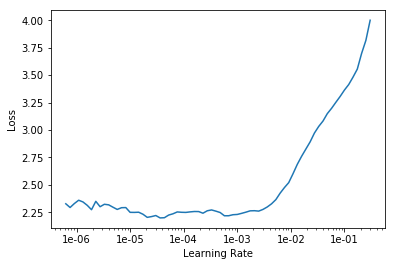

In [16]:
learn.lr_find()
learn.recorder.plot()

In [17]:
lr = 3e-5
lrs = learn.lr_range(slice(lr))

In [18]:
learn.fit_one_cycle(10 , lrs)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy
1,2.184091,0.910215,0.833861,0.959406
2,2.045181,0.649704,0.871238,0.972376
3,1.844655,0.560691,0.888465,0.977871
4,1.831252,0.537541,0.894901,0.979208
5,1.896692,0.544683,0.898713,0.980347
6,1.882228,0.534456,0.898911,0.979703
7,1.854000,0.541679,0.900149,0.980891
8,1.909535,0.522924,0.902327,0.980396
9,1.843622,0.532596,0.900693,0.981238
10,1.806885,0.536707,0.901386,0.980792


In [19]:
learn.save('stage-9')

In [20]:
learn.fit_one_cycle(10 , lrs*10)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy
1,1.815779,0.534492,0.903515,0.981535
2,1.902804,0.542731,0.903069,0.980693
3,1.792023,0.536932,0.900990,0.980198
4,1.798880,0.524585,0.901881,0.982277
5,1.863350,0.515241,0.904208,0.982079
6,1.704533,0.508359,0.909010,0.982772
7,1.689105,0.487770,0.910347,0.982822
8,1.714370,0.503977,0.912376,0.983366
9,1.729796,0.484967,0.913119,0.983812
10,1.690159,0.486942,0.913366,0.983564


In [21]:
learn.save('stage-10')

# Proper test set

In [51]:
tfms = get_transforms()
size = 256
bs = 32

In [52]:
data = (ImageItemList.from_folder(path) #Where to find the data? -> in path and its subfolders
        .split_by_valid_func(is_test)           #How to split in train/valid? -> use the folders
        .label_from_folder()            #How to label? -> depending on the folder of the filenames
        .transform(tfms, size=size)       #Data augmentation? -> use tfms with a size of 64
        .databunch(bs=bs))

In [56]:
k = 'resnet50'
v = m[k]
learn = create_cnn(data, v, metrics=[accuracy, top_k_accuracy]).mixup()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


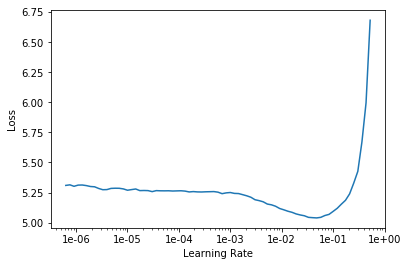

In [57]:
learn.lr_find()
learn.recorder.plot()

In [58]:
lr = 8e-3

In [59]:
learn.freeze()
learn.fit_one_cycle(10 , lr)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy
1,2.971021,1.552204,0.615168,0.864515
2,2.962185,1.685160,0.584119,0.843644
3,2.954129,1.674722,0.589347,0.845901
4,2.934508,1.492622,0.632594,0.876040
5,2.762323,1.363006,0.671683,0.900079
6,2.681143,1.180924,0.718812,0.920317
7,2.561123,1.060939,0.754455,0.935446
8,2.424480,0.960789,0.781703,0.945109
9,2.426804,0.927441,0.795129,0.950139
10,2.343256,0.912756,0.799010,0.952158


In [60]:
learn.save('stage-2.1')

In [61]:
learn.unfreeze()

In [62]:
lr = 3e-5
lrs = learn.lr_range(slice(lr))

In [63]:
learn.fit_one_cycle(10 , lrs)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy
1,2.341244,0.911561,0.800673,0.952594
2,2.308709,0.898633,0.801901,0.952515
3,2.287248,0.883974,0.803842,0.954852
4,2.323829,0.873781,0.808238,0.954852
5,2.347083,0.855382,0.812198,0.956673
6,2.332917,0.850742,0.814891,0.958099
7,2.288705,0.844433,0.816911,0.957426
8,2.302094,0.841015,0.816871,0.958218
9,2.278325,0.836853,0.819089,0.958455
10,2.247155,0.843670,0.818693,0.958614


In [64]:
learn.save('stage-2.2')

In [65]:
size = 512
bs = 12

In [66]:
data = (ImageItemList.from_folder(path) #Where to find the data? -> in path and its subfolders
        .split_by_valid_func(is_test)           #How to split in train/valid? -> use the folders
        .label_from_folder()            #How to label? -> depending on the folder of the filenames
        .transform(tfms, size=size)       #Data augmentation? -> use tfms with a size of 64
        .databunch(bs=bs))

In [67]:
learn.fit_one_cycle(10 , lrs)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy
1,2.333732,0.835448,0.817030,0.957861
2,2.207324,0.835494,0.818455,0.959446
3,2.252901,0.829619,0.819406,0.959168
4,2.202685,0.817875,0.824079,0.960673
5,2.261568,0.809109,0.824198,0.960594
6,2.189847,0.809265,0.826218,0.960792
7,2.236681,0.811939,0.826970,0.961030
8,2.178749,0.806396,0.827723,0.961545
9,2.304216,0.793551,0.827881,0.961426
10,2.182710,0.803187,0.827248,0.961307


In [68]:
learn.save('stage-2.3')

In [69]:
learn.fit_one_cycle(10 , lrs*10)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy
1,2.244440,0.816977,0.827248,0.961743
2,2.259934,0.851043,0.814970,0.957663
3,2.260163,0.852826,0.817228,0.957703
4,2.265818,0.815365,0.823604,0.960713
5,2.187158,0.777567,0.831168,0.963564
6,2.094694,0.735240,0.842891,0.966931
7,2.076376,0.705466,0.849545,0.969584
8,2.045869,0.689545,0.856911,0.970693
9,2.052191,0.683542,0.858178,0.971485
10,2.038957,0.688854,0.857465,0.971406


In [70]:
learn.save('stage-2.4')

In [72]:
learn.load('stage-2.4')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (75750 items)
[Category deviled_eggs, Category deviled_eggs, Category deviled_eggs, Category deviled_eggs, Category deviled_eggs]...
Path: ../datasets/food-101/food-101/images
x: ImageItemList (75750 items)
[Image (3, 512, 512), Image (3, 512, 512), Image (3, 512, 384), Image (3, 339, 512), Image (3, 512, 512)]...
Path: ../datasets/food-101/food-101/images;

Valid: LabelList
y: CategoryList (25250 items)
[Category deviled_eggs, Category deviled_eggs, Category deviled_eggs, Category deviled_eggs, Category deviled_eggs]...
Path: ../datasets/food-101/food-101/images
x: ImageItemList (25250 items)
[Image (3, 512, 512), Image (3, 512, 512), Image (3, 288, 512), Image (3, 512, 384), Image (3, 512, 512)]...
Path: ../datasets/food-101/food-101/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.

In [73]:
learn.data = data

In [74]:
learn.fit_one_cycle(10 , lrs)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy
1,2.329347,0.848583,0.819406,0.958337
2,2.244070,0.722561,0.841822,0.966099
3,2.215420,0.668634,0.849307,0.970059
4,2.118557,0.648824,0.856911,0.971644
5,2.154531,0.637631,0.857703,0.971881
6,2.070776,0.632107,0.859049,0.972475
7,2.071417,0.632581,0.861901,0.971960
8,2.098149,0.625159,0.861109,0.973149
9,2.061102,0.620624,0.863881,0.972792
10,2.064658,0.621904,0.861663,0.973426


In [75]:
learn.save('stage-2.6')

In [77]:
learn.load('stage-2.6')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (75750 items)
[Category deviled_eggs, Category deviled_eggs, Category deviled_eggs, Category deviled_eggs, Category deviled_eggs]...
Path: ../datasets/food-101/food-101/images
x: ImageItemList (75750 items)
[Image (3, 512, 512), Image (3, 512, 512), Image (3, 512, 384), Image (3, 339, 512), Image (3, 512, 512)]...
Path: ../datasets/food-101/food-101/images;

Valid: LabelList
y: CategoryList (25250 items)
[Category deviled_eggs, Category deviled_eggs, Category deviled_eggs, Category deviled_eggs, Category deviled_eggs]...
Path: ../datasets/food-101/food-101/images
x: ImageItemList (25250 items)
[Image (3, 512, 512), Image (3, 512, 512), Image (3, 288, 512), Image (3, 512, 384), Image (3, 512, 512)]...
Path: ../datasets/food-101/food-101/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.

In [78]:
learn.fit_one_cycle(10 , lrs)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy
1,2.026673,0.620212,0.863723,0.973782
2,2.082638,0.623362,0.864198,0.973347
3,2.090471,0.613573,0.862772,0.972713
4,2.048131,0.605624,0.865030,0.973703
5,2.013076,0.609619,0.867208,0.974653
6,2.056159,0.594637,0.868396,0.974851
7,2.072855,0.592450,0.869663,0.974812
8,1.961743,0.601718,0.868356,0.974495
9,2.039277,0.595321,0.870139,0.976198
10,2.057633,0.592588,0.871089,0.975327


In [79]:
learn.save('stage-2.7')

In [80]:
learn.fit_one_cycle(15 , lrs)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy
1,1.973057,0.595735,0.871406,0.976000
2,2.085799,0.593612,0.869545,0.975604
3,1.937535,0.600088,0.870059,0.975802
4,2.000334,0.604645,0.867446,0.976158
5,2.021252,0.585480,0.871485,0.975208
6,2.006656,0.600038,0.872396,0.975248
7,1.995823,0.587551,0.873267,0.976277
8,1.975274,0.590335,0.872673,0.975564
9,2.057662,0.577929,0.874455,0.976119
10,1.966627,0.577869,0.875208,0.976673


In [81]:
learn.save('stage-2.8')

In [82]:
learn.fit_one_cycle(8 , lrs/10)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy
1,1.942339,0.564074,0.875485,0.977228
2,1.944106,0.566908,0.876713,0.977109
3,1.967389,0.570058,0.876515,0.977188
4,1.894628,0.560201,0.876594,0.977347
5,1.953758,0.559496,0.875683,0.977386
6,1.917318,0.570242,0.876634,0.977069
7,1.941507,0.566564,0.876040,0.977030
8,1.925645,0.566837,0.876475,0.976792
